In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import init_utils # 初始化工具包

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# 初始化参数

在初始化之前，我们先来看看数据集是怎样的：

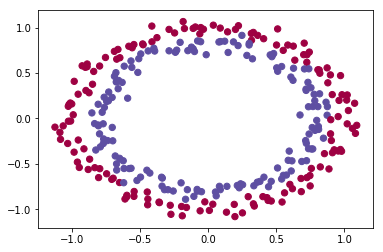

In [2]:
train_X,train_Y,test_X,test_Y = init_utils.load_dataset(is_plot=True)

我们要建立一个分类器把蓝点和红点分开，在之前我们实现过一个3层的神经网络，我们将对它进行下面3种初始化方法的尝试：
- 初始化为0：在输入参数种全部初始化为0，参数名为initialization = "zeros"，核心代码：
```
parameters['W'+str(l)] = np.zeros((layers_dims[l],layers_dims[l-1]))
```
- 初始化为随机数：把输入参数设置为随机值，权重初始化为大的随机值。参数名为initalization = 'random'，核心代码：
```
parameters['W'+str(l)] = np.random.randn((layers_dims[l],layers_dims[l-1])) * 10
```
- 抑梯度异常初始化：抑制梯度消失或梯度爆炸的趋势，参数名为initialization='he'，核心代码：
```
parameters['W'+str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
```

然后我们来看看我们的模型是怎样的：

In [6]:
def model(X,Y,learning_rate = 0.01,num_iterations = 15000,print_cost=True,initialization="he",is_plot=True):
    """
    实现一个三层的神经网络：LINEAR->RELU->LINEAR->RELU->LENEAR->SIGMOID
    
    参数：
        X - 输入的数据，维度为（2，要训练/测试的数量）
        Y - 标签，【0 | 1】，维度为（1，对应的输入数据的数量）
        learning_rate - 学习速率
        num_iterations - 迭代次数
        print_cost - 是否打印成本值，每迭代1000次打印一次
        initialization - 字符串类型，初始化类型【"zeros" | "random" | "he"】
        is_plot - 是否绘制梯度下降代价函数曲线图
        
    返回：
        parameters - 学习后的参数
    """
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0],10,5,1]
    
    # 选择初始化参数的类型
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    else:
        print("错误的初始化参数！程序退出")
        exit
        
    # 开始学习
    for i in range(0,num_iterations):
        # 前向传播
        a3,cache = init_utils.forward_propagation(X,parameters)
        
        # 计算成本
        cost = init_utils.compute_loss(a3,Y)
        
        # 反向传播
        grads = init_utils.backward_propagation(X,Y,cache)
        
        # 更新参数
        parameters = init_utils.update_parameters(parameters,grads,learning_rate)
        
        # 记录成本
        if i % 1000 == 0:
            costs.append(cost)
            # 打印成本
            if print_cost:
                print("第"+str(i)+"次迭代，成本值为："+str(cost))
                
    # 绘制成本曲线
    if is_plot:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations(per hundreds)')
        plt.title("Learning rate="+str(learning_rate))
        plt.show()
            
    # 返回学习完毕后的参数
    return parameters

## 初始化为零

In [7]:
def initialize_parameters_zeros(layers_dims):
    """
    将模型的参数全部设置为0
    
    参数：
        layers_dims - 列表类型，神经网络每一层的节点数
        
    返回：
        parameters - 包含了所有W和b的字典
            W1 - 权重矩阵，维度为（layers_dims[1],layers_dims[0]）
            b1 - 偏置向量，维度为（layers_dimsa[1],1）
            ……
            WL - 权重矩阵，维度为（layers_dimsa[L],layers_dims[L-1]）
            bL - 偏置向量，维度为（layers_dims[L],1）
    """
    parameters = {}
    
    L = len(layers_dims) # 网络层数
    
    for l in range(1,L):
        parameters["W"+str(l)] = np.zeros((layers_dims[l],layers_dims[l-1]))
        parameters["b"+str(l)] = np.zeros((layers_dims[l],1))
        
        # 使用断言确保我的数据格式是对的
        assert(parameters["W"+str(l)].shape == (layers_dims[l],layers_dims[l-1]))
        assert(parameters["b"+str(l)].shape == (layers_dims[l],1))
        
    return parameters

测试一下initialize_parameters_zeros函数：

In [8]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


我们可以看到W和b全部被初始化为0了，那么我们使用这些参数来训练模型，结果会怎样呢？

第0次迭代，成本值为：0.6931471805599453
第1000次迭代，成本值为：0.6931471805599453
第2000次迭代，成本值为：0.6931471805599453
第3000次迭代，成本值为：0.6931471805599453
第4000次迭代，成本值为：0.6931471805599453
第5000次迭代，成本值为：0.6931471805599453
第6000次迭代，成本值为：0.6931471805599453
第7000次迭代，成本值为：0.6931471805599453
第8000次迭代，成本值为：0.6931471805599453
第9000次迭代，成本值为：0.6931471805599453
第10000次迭代，成本值为：0.6931471805599455
第11000次迭代，成本值为：0.6931471805599453
第12000次迭代，成本值为：0.6931471805599453
第13000次迭代，成本值为：0.6931471805599453
第14000次迭代，成本值为：0.6931471805599453


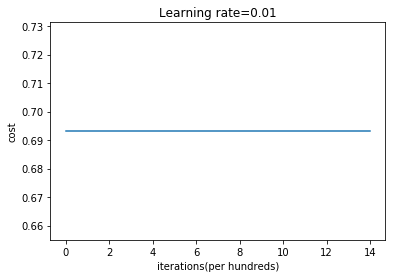

In [9]:
parameters = model(train_X,train_Y,initialization = "zeros",is_plot = True)

从上图种我们可以看到代价值一直没有变化，也就是说这个模型根本没有学习。我们来看看预测的结果怎么样：

In [10]:
print("训练集：")
predictions_train = init_utils.predict(train_X,train_Y,parameters)
print("测试集：")
predictions_test = init_utils.predict(test_X,test_Y,parameters)

训练集：
Accuracy: 0.5
测试集：
Accuracy: 0.5


性能确实很差，而且成本并没有真正的降低，但是算法的性能比随机猜测要好？为什么？让我们看看预测和决策边界的细节：

predictions_train[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


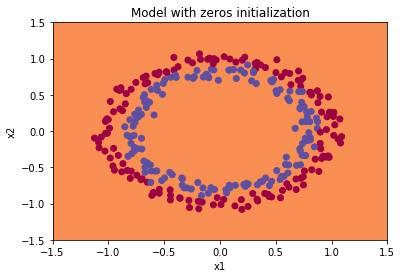

In [13]:
print("predictions_train"+str(predictions_train))
print("predictions_test"+str(predictions_test))

plt.title("Model with zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(parameters,x.T),train_X,np.squeeze(train_Y))

分类失败，该模型预测每个都为0。通常来说，零初始化会导致神经网络无法打破对称性，最终导致的结果就是无论网络有多少层，只能得到和Logistic函数一样的结果。

## 随机初始化

为了打破对称性，我们可以随机给参数赋值。在随机初始化之后，每个神经元可以开始学习其输入的不同功能，我们还会设置较大的参数，看看会发生些什么。

In [21]:
def initialize_parameters_random(layers_dims):
    """
    参数：
        layers_dims - 列表，包含模型每一层的节点数
    
    返回：
        parameters - 包含了所有W和b的字典
        W1 - 权重矩阵，维度为（layers_dims[1],layers_dims[0]）
        b1 - 偏置向量，维度为（layers_dims[1],1）
        ……
        WL - 权重矩阵，维度为（layers_dims[L],layers_dims[L-1]）
        bL - 偏置向量，维度为（layers_dims[L],1）
    """
    np.random.seed(3) # 指定随机种子
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1,L):
        parameters['W'+str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * 10
        parameters['b'+str(l)] = np.zeros((layers_dims[l],1))
        
        #使用断言确保我的数据格式是正确的
        assert(parameters["W" + str(l)].shape == (layers_dims[l],layers_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l],1))

    return parameters

我们来测试一下initialize_parameters_random函数：

In [22]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


看起来这些参数都是比较大的，我们来看看实际运行起来会怎么样：

E:\Code\DeepLearning\dl-exercise\改善深层神经网络\PA1+-+ 初始化、正则化、梯度校验+-+\init_utils.py:50: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
E:\Code\DeepLearning\dl-exercise\改善深层神经网络\PA1+-+ 初始化、正则化、梯度校验+-+\init_utils.py:50: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


第0次迭代，成本值为：inf
第1000次迭代，成本值为：0.6239567039908781
第2000次迭代，成本值为：0.5978043872838292
第3000次迭代，成本值为：0.563595830364618
第4000次迭代，成本值为：0.5500816882570866
第5000次迭代，成本值为：0.5443417928662615
第6000次迭代，成本值为：0.5373553777823036
第7000次迭代，成本值为：0.4700141958024487
第8000次迭代，成本值为：0.3976617665785177
第9000次迭代，成本值为：0.39344405717719166
第10000次迭代，成本值为：0.39201765232720626
第11000次迭代，成本值为：0.38910685278803786
第12000次迭代，成本值为：0.38612995897697244
第13000次迭代，成本值为：0.3849735792031832
第14000次迭代，成本值为：0.38275100578285265


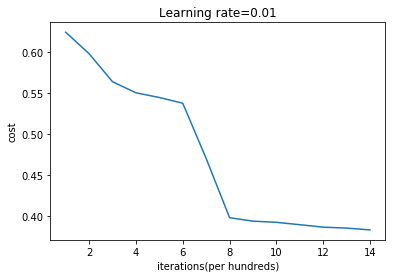

训练集：
Accuracy: 0.83
测试集：
Accuracy: 0.86
[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


In [23]:
parameters = model(train_X,train_Y,initialization="random",is_plot=True)
print("训练集：")
predictions_train = init_utils.predict(train_X,train_Y,parameters)
print("测试集：")
predictions_test = init_utils.predict(test_X,test_Y,parameters)

print(predictions_train)
print(predictions_test)

我们把图绘制出来，看看分类的结果是怎样的。

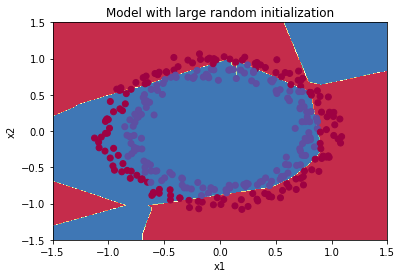

In [25]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(parameters, x.T), train_X, np.squeeze(train_Y))

可以看到误差开始的时候很大。这是因为由于具有较大的随机权重，最后一个激活（sigmoid）输出的结果会非常接近于0或者1，而当它预测错误时，会导致非常大的损失。初始化参数如果没有很好的话，会导致梯度消失、梯度爆炸，这也会减慢优化算法。如果我们对这个网络进行更长时间的训练，我们将看到更好的效果，但是如果使用过大的随机初始化参数会减慢优化的速度。

 ## 抑梯度异常初始化

将权重初始化为较大的参数时，效果并不好，下面我们试试小一点的参数值。我们会用到:

$$
\begin{equation}
\sqrt{\frac{2}{上一层的维度}}
\end{equation}
$$

In [26]:
def initialize_parameters_he(layers_dims):
    """
    参数：
        layers_dims - 列表，模型每一层的节点数
        
    返回：
        parameters - 包含了所有的W和b的字典
            W1 - 权重矩阵，维度为（layers_dims[l],layers_dims[0]）
            b1 - 偏置向量，维度为（layers_dims[l],1）
            ……
            WL - 权重矩阵，维度为（layers_dims[L],layers_dims[L-1]）
            bL - 偏置向量，维度为（layers_dims[L],1）
    """
    
    np.random.seed(3) # 指定随机种子
    parameters = {}
    L = len(layers_dims) # 网络层数
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2 / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
        #使用断言确保我的数据格式是正确的
        assert(parameters["W" + str(l)].shape == (layers_dims[l],layers_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l],1))
        
    return parameters

测试一下initialize_parameters_he函数：

In [28]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


这样我们就把参数W初始化到了1附近，我们来看看实际运行一下：

第0次迭代，成本值为：0.8830537463419761
第1000次迭代，成本值为：0.6879825919728063
第2000次迭代，成本值为：0.6751286264523371
第3000次迭代，成本值为：0.6526117768893807
第4000次迭代，成本值为：0.6082958970572938
第5000次迭代，成本值为：0.5304944491717495
第6000次迭代，成本值为：0.4138645817071794
第7000次迭代，成本值为：0.3117803464844441
第8000次迭代，成本值为：0.23696215330322562
第9000次迭代，成本值为：0.18597287209206836
第10000次迭代，成本值为：0.15015556280371817
第11000次迭代，成本值为：0.12325079292273552
第12000次迭代，成本值为：0.09917746546525932
第13000次迭代，成本值为：0.08457055954024274
第14000次迭代，成本值为：0.07357895962677362


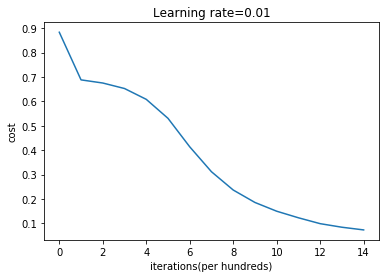

训练集:
Accuracy: 0.9933333333333333
测试集:
Accuracy: 0.96


In [30]:
parameters = model(train_X, train_Y, initialization = "he",is_plot=True)
print("训练集:")
predictions_train = init_utils.predict(train_X, train_Y, parameters)
print("测试集:")
init_utils.predictions_test = init_utils.predict(test_X, test_Y, parameters)

我们可以看到误差越来越小，我们来绘制一下预测的情况：

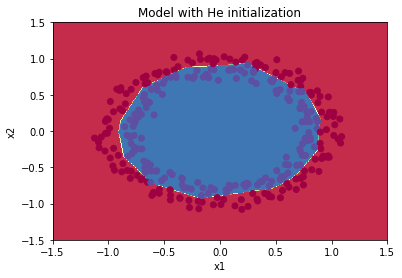

In [32]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(parameters, x.T), train_X, np.squeeze(train_Y))

总结一下：
- 不同的初始化方法可能导致不同的性能
- 随机初始化有助于打破对称，使得不同隐藏层的单元可以学习到不同的参数
- 初始化时，初始值不宜过大
- he初始化搭配ReLU激活函数常常可以得到不错的效果